# Метод градиентного спуска

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Градиент и метод градиентного спуска

### Функция нескольких переменных

$$ f(w_1, w_2) = w_1^2 + w_2^2 $$

Создадим трехмерный график функции потерь

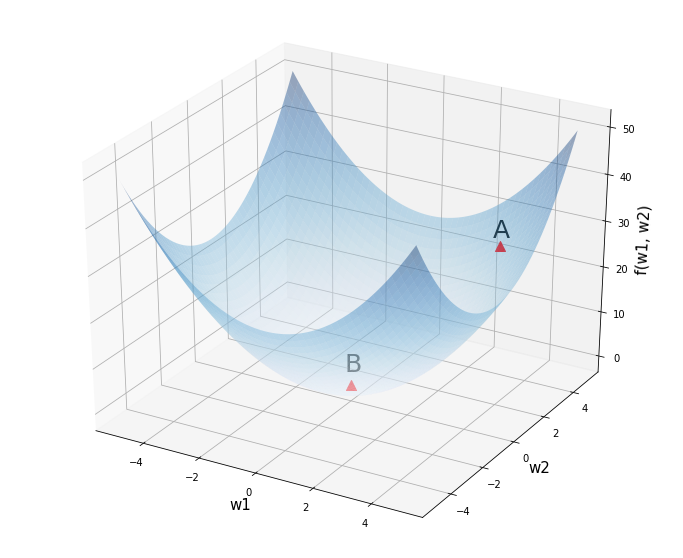

In [ ]:
# установим размер графика
fig = plt.figure(figsize = (12,10))

# создадим последовательность из 1000 точек в интервале от -5 до 5
# для осей w1 и w2
w1 = np.linspace(-5, 5, 1000)
w2 = np.linspace(-5, 5, 1000)

# создадим координатную плоскость из осей w1 и w2
w1, w2 = np.meshgrid(w1, w2)

# пропишем функцию
f = w1 ** 2 + w2 ** 2

# создадим трехмерное пространство
ax = fig.add_subplot(projection = '3d')

# выведем график функции, alpha задает прозрачность
ax.plot_surface(w1, w2, f, alpha = 0.4, cmap = 'Blues')

# выведем точку A с координатами (3, 4, 25) и подпись к ней
ax.scatter(3, 4, 25, c = 'red', marker = '^', s = 100)
ax.text(3, 3.5, 28, 'A', size = 25)

# аналогично выведем точку B с координатами (0, 0, 0)
ax.scatter(0, 0, 0, c = 'red', marker = '^', s = 100)
ax.text(0, -0.4, 4, 'B', size = 25)

# укажем подписи к осям
ax.set_xlabel('w1', fontsize = 15)
ax.set_ylabel('w2', fontsize = 15)
ax.set_zlabel('f(w1, w2)', fontsize = 15)

# выведем результат
plt.show()

Построим изолинии этой функции

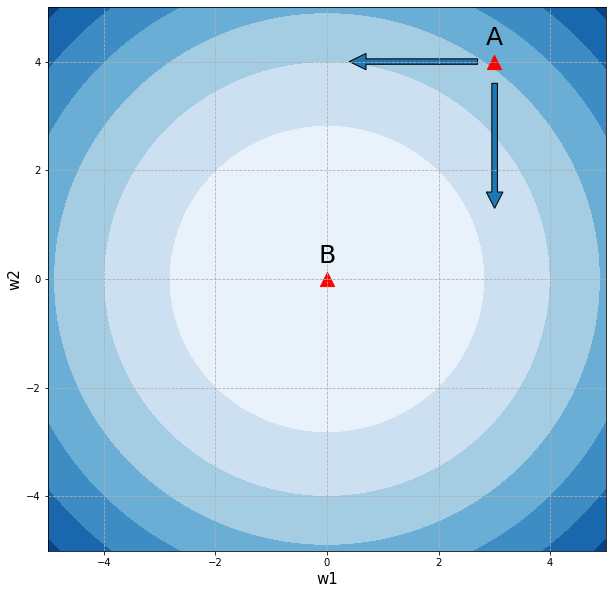

In [ ]:
# установим размер графика
fig, ax = plt.subplots(figsize = (10,10))

# создадим последовательность из 100 точек в интервале от -5 до 5
# для осей w1 и w2
w1 = np.linspace(-5.0, 5.0, 100)
w2 = np.linspace(-5.0, 5.0, 100)

# создадим координатную плоскость из осей w1 и w2
w1, w2 = np.meshgrid(w1, w2)

# пропишем функцию
C = w1 ** 2 + w2 ** 2

# построим изолинии (линии уровня)
plt.contourf(w1, w2, C, cmap = 'Blues')

# выведем точку А с координатами на плоскости (3, 4)
ax.scatter(3, 4, c = 'red', marker = '^', s = 200)
ax.text(2.85, 4.3, 'A', size = 25)

# и точку B с координатами (0, 0)
ax.scatter(0, 0, c = 'red', marker = '^', s = 200)
ax.text(-0.15, 0.3, 'B', size = 25)

# укажем подписи к осям
ax.set_xlabel('w1', fontsize = 15)
ax.set_ylabel('w2', fontsize = 15)

# а также стрелки направления изменений вдоль w1 и w2
ax.arrow(2.7, 4, -2, 0, width = 0.1, head_length = 0.3)
ax.arrow(3.005, 3.6, 0, -2, width = 0.1, head_length = 0.3)

# создадим сетку в виде прерывистой черты
plt.grid(linestyle = '--')

# выведем результат
plt.show()

### Частная производная

Сечение многомерной функции

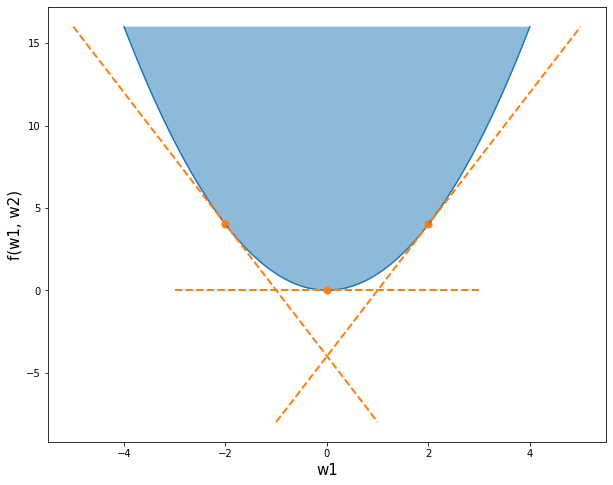

In [ ]:
# зададим размер графика в дюймах
plt.figure(figsize = (10, 8))

# объявим функцию параболы
def f(x):
  return x ** 2

# объявим ее производную
def der(x):
  return 2 * x

# пропишем уравнение через point-slope form
# y - y1 = m * (x - x1) --> y = m * (x - x1) + y1
def line(x, x1, y1):
  return der(x1) * (x - x1) + y1

# создадим последовательность координат x для параболы
x = np.linspace(-4, 4, 100)

# построим график параболы
plt.plot(x, f(x))

# и заполним ее по умолчанию синим цветом с прозрачностью 0,5
plt.fill_between(x, f(x), 16, alpha = 0.5)

# в цикле пройдемся по точкам -2, 0, 2 на оси х
for x1 in range(-2, 3, 2):

  # рассчитаем соответствующие им координаты y
  y1 = f(x1)

  # определим пространство по оси x для касательных линий
  xrange = np.linspace(x1 - 3, x1 + 3, 9)

  # построим касательные линии
  plt.plot(xrange, line(xrange, x1, y1), 'C1--', linewidth = 2)

  # и точки соприкосновения с графиком параболы
  plt.scatter(x1, y1, color = 'C1', s = 50)

# укажем подписи к осям
plt.xlabel('w1', fontsize = 15)
plt.ylabel('f(w1, w2)', fontsize = 15)

# выведем результат
plt.show()

Взятие частных производных с помощью SymPy

In [ ]:
# импортируем фукцию diff() и
from sympy import diff

# превратим x и y в символы
from sympy.abc import x, y

In [ ]:
# напишем функцию, которую хотим дифференцировать
f = x ** 2 + y ** 2

In [ ]:
# найдем частную производную по первой переменной
diff(f, x)

2*x

In [ ]:
# найдем частную производную по второй переменной
diff(f, y)

2*y

### Метод градиентного спуска

Вектор антиградиента на графике

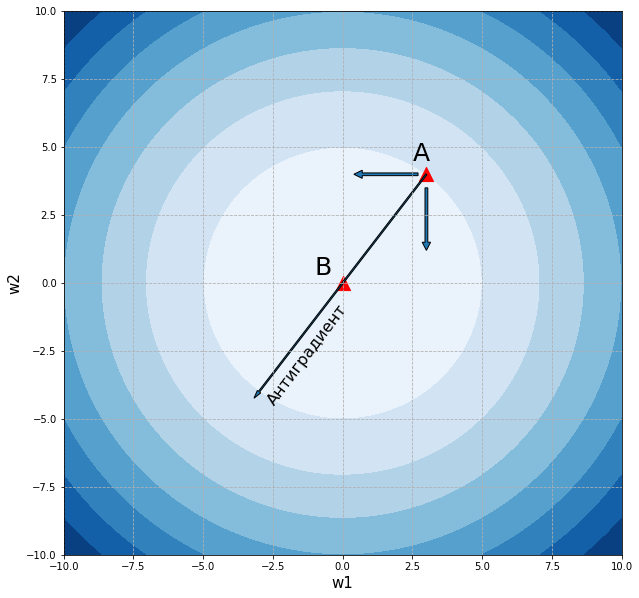

In [ ]:
# установим размер графика
fig, ax = plt.subplots(figsize = (10,10))

# создадим последовательность из 100 точек в интервале от -10 до 10
# для осей w1 и w2
w1 = np.linspace(-10.0, 10.0, 100)
w2 = np.linspace(-10.0, 10.0, 100)

# создадим координатную плоскость из осей w1 и w2
w1, w2 = np.meshgrid(w1, w2)

# пропишем функцию
C = w1 ** 2 + w2 ** 2

# построим изолинии (линии уровня)
plt.contourf(w1, w2, C, cmap = 'Blues')

# выведем точку А с координатами на плоскости (3, 4)
ax.scatter(3, 4, c = 'red', marker = '^', s = 200)
ax.text(2.5, 4.5, 'A', size = 25)

# и точку B с координатами (0, 0)
ax.scatter(0, 0, c = 'red', marker = '^', s = 200)
ax.text(-1, 0.3, 'B', size = 25)

# укажем подписи к осям
ax.set_xlabel('w1', fontsize = 15)
ax.set_ylabel('w2', fontsize = 15)

# а также стрелки направления изменений вдоль w1 и w2
ax.arrow(2.7, 4, -2, 0, width = 0.1, head_length = 0.3)
ax.arrow(3, 3.5, 0, -2, width = 0.1, head_length = 0.3)

# выведем вектор антиградиента с направлением (-6, -8)
ax.arrow(3, 4, -6, -8, width = 0.05, head_length = 0.3)
ax.text(-2.8, -4.5, 'Антиградиент', rotation = 53, size = 16)

# создадим сетку в виде прерывистой черты
plt.grid(linestyle = '--')

# выведем результат
plt.show()

Оптимизация методом градиентного спуска

In [ ]:
# пропишем функцию потерь
def objective(w1, w2):
    return w1 ** 2 + w2 ** 2

# а также производную по первой
def partial_1(w1):
    return 2.0 * w1

# и второй переменной
def partial_2(w2):
  return 2.0 * w2

In [ ]:
# пропишем изначальные веса
w1, w2 = 3, 4

# количество итераций
iter = 100

# и скорость обучения
learning_rate = 0.05

In [ ]:
# создадим списки для учета весов и уровня ошибки
w1_list, w2_list, l_list = [], [], []

In [ ]:
# в цикле с заданным количеством итераций
for i in range(iter):

  # будем добавлять текущие веса в соответствующие списки
  w1_list.append(w1)
  w2_list.append(w2)

  # и рассчитывать и добавлять в список текущий уровень ошибки
  l_list.append(objective(w1, w2))

  # также рассчитаем значение частных производных при текущих весах
  par_1 = partial_1(w1)
  par_2 = partial_2(w2)

  # будем обновлять веса в направлении,
  # обратном направлению градиента, умноженному на скорость обучения
  w1 = w1 - learning_rate * par_1
  w2 = w2 - learning_rate * par_2

# выведем итоговые веса модели и значение функции потерь
w1, w2, objective(w1, w2)

(7.968419666276241e-05, 0.00010624559555034984, 1.7637697771638315e-08)

Минимизация функции потерь на графике

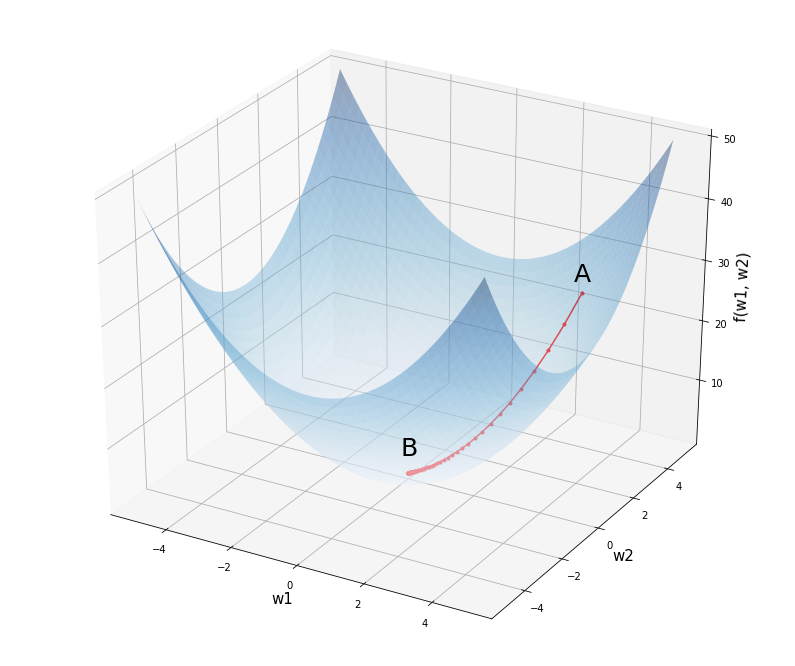

In [ ]:
fig = plt.figure(figsize = (14,12))

w1 = np.linspace(-5, 5, 1000)
w2 = np.linspace(-5, 5, 1000)

w1, w2 = np.meshgrid(w1, w2)

f = w1 ** 2 + w2 ** 2

ax = fig.add_subplot(projection = '3d')

ax.plot_surface(w1, w2, f, alpha = 0.4, cmap = 'Blues')

ax.text(3, 3.5, 28, 'A', size = 25)
ax.text(0, -0.4, 4, 'B', size = 25)

ax.set_xlabel('w1', fontsize = 15)
ax.set_ylabel('w2', fontsize = 15)
ax.set_zlabel('f(w1, w2)', fontsize = 15)

# выведем путь алгоритма оптимизации
ax.plot(w1_list, w2_list, l_list, '.-', c = 'red')

plt.show()

## Простая линейная регрессия

### Данные и постановка задачи

In [ ]:
# возьмем уже известные нам данные роста и обхвата шеи
X = np.array([1.48, 1.49, 1.49, 1.50, 1.51, 1.52, 1.52, 1.53, 1.53, 1.54, 1.55, 1.56, 1.57, 1.57, 1.58, 1.58, 1.59, 1.60, 1.61, 1.62, 1.63, 1.64, 1.65, 1.65, 1.66, 1.67, 1.67, 1.68, 1.68,  1.69, 1.70, 1.70, 1.71, 1.71, 1.71, 1.74, 1.75, 1.76, 1.77, 1.77, 1.78])
y = np.array([29.1, 30.0, 30.1, 30.2, 30.4, 30.6, 30.8, 30.9, 31.0, 30.6, 30.7, 30.9, 31.0, 31.2, 31.3, 32.0, 31.4, 31.9, 32.4, 32.8, 32.8, 33.3, 33.6, 33.0, 33.9, 33.8, 35.0, 34.5, 34.7, 34.6, 34.2, 34.8, 35.5, 36.0, 36.2, 36.3, 36.6, 36.8, 36.8, 37.0, 38.5])

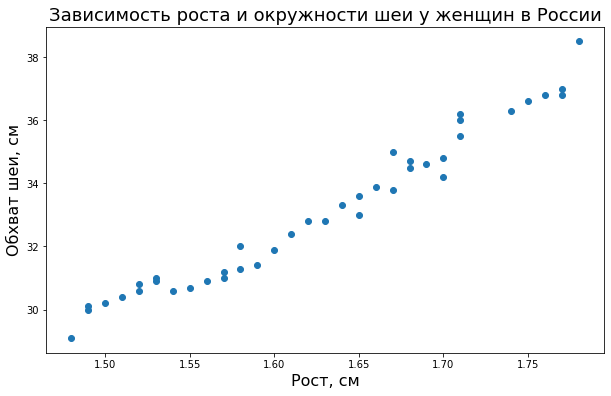

In [ ]:
# построим точечную диаграмму
plt.figure(figsize = (10,6))
plt.scatter(X, y)

# добавим подписи
plt.xlabel('Рост, см', fontsize = 16)
plt.ylabel('Обхват шеи, см', fontsize = 16)
plt.title('Зависимость роста и окружности шеи у женщин в России', fontsize = 18)

plt.show()

### Метод наименьших квадратов

#### Собственная модель

In [ ]:
# найдем среднее значение X и y
X_mean = np.mean(X)
y_mean = np.mean(y)

# объявим переменные для числителя и знаменателя
numerator, denominator = 0, 0

# в цикле пройдемся по данным
for i in range(len(X)):

    # вычислим значения числителя и знаменателя по формуле выше
    numerator += (X[i] - X_mean) * (y[i] - y_mean)
    denominator += (X[i] - X_mean) ** 2

# найдем наклон и сдвиг
w = numerator / denominator
b = y_mean - w * X_mean

w, b

(26.861812005569753, -10.570936299787313)

In [ ]:
# то же решение, но с векторизованным кодом
w = np.sum((X - X_mean) * (y - y_mean)) / np.sum((X - X_mean) ** 2)
b = y_mean - w * X_mean

w, b

(26.861812005569757, -10.57093629978732)

#### Модель LinearRegression

In [ ]:
# из набора линейных моделей библиотеки sklearn импортируем линейную регрессию
from sklearn.linear_model import LinearRegression

# создадим объект этого класса и запишем в переменную model
model = LinearRegression()

# обучим модель (для X используем двумерный массив)
model.fit(X.reshape(-1, 1), y)

# выведем коэффициенты
model.coef_, model.intercept_

(array([26.86181201]), -10.570936299787334)

In [ ]:
# сделаем прогноз
y_pred_least_squares = model.predict(X.reshape(-1, 1))

# импортируем модуль метрик
from sklearn import metrics

# выведем среднеквадратическую ошибку (MSE)
metrics.mean_squared_error(y, y_pred_least_squares)

0.2273395626677337

### Метод градиентного спуска

#### Исходная функция (линейная регрессия)

In [ ]:
def regression(X, w, b):
  return w * X + b

#### Функция потерь (half MSE)

In [ ]:
def objective(X, y, w, b, n):
  return np.sum((y - regression(X, w, b)) ** 2) / (2 * n)

#### Частные производные (градиент) функции потерь

In [ ]:
def partial_w(X, y, w, b, n):
  return np.sum(-X * (y - (w * X + b))) / n

def partial_b(X, y, w, b, n):
  return np.sum(-(y - (w * X + b))) / n

#### Алгоритм градиентного спуска

In [ ]:
# передадим функции данные, количество итераций и скорость обучения
def gradient_descent(X, y, iter, learning_rate):

  # зададим изначальные веса
  w, b = 0, 0
  # и количество наблюдений
  n = len(X)

  # создадим списки для записи весов модели и уровня ошибки
  w_list, b_list, l_list = [], [], []

  # в цикле с заданным количеством итераций
  for i in range(iter):

    # добавим в списки текущие веса
    w_list.append(w)
    b_list.append(b)
    # и уровень ошибки
    l_list.append(objective(X, y, w, b, n))

    # рассчитаем текущее значение частных производных
    par_1 = partial_w(X, y, w, b, n)
    par_2 = partial_b(X, y, w, b, n)

    # обновим веса в направлении антиградиента
    w = w - learning_rate * par_1
    b = b - learning_rate * par_2

  # выведем списки с уровнями ошибки и весами
  return w_list, b_list, l_list

#### Обучение модели

In [ ]:
# распакуем результат работы функции в три переменные
w_list, b_list, l_list = gradient_descent(X, y, iter = 200000, learning_rate = 0.01)

# и выведем последние достигнутые значения уровня ошибки и весов
print(w_list[-1], b_list[-1], l_list[-1])

26.69174625207742 -10.293843835595947 0.11378239841533976


#### Прогноз

In [ ]:
# сделаем прогноз, используя наиболее оптимальные веса
y_pred_gd = regression(X, w_list[-1], b_list[-1])
y_pred_gd[:5]

array([29.20994062, 29.47685808, 29.47685808, 29.74377554, 30.01069301])

#### Графики

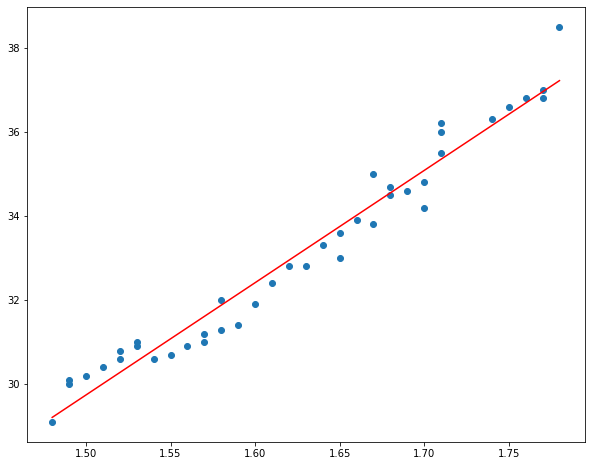

In [ ]:
# выведем прямую регрессии
plt.figure(figsize = (10, 8))
plt.scatter(X, y)
plt.plot(X, y_pred_gd, 'r')
plt.show()

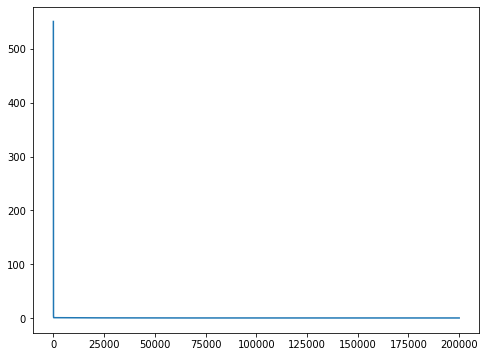

In [ ]:
# посмотрим на уровень ошибки
plt.figure(figsize = (8, 6))
plt.plot(l_list)
plt.show()

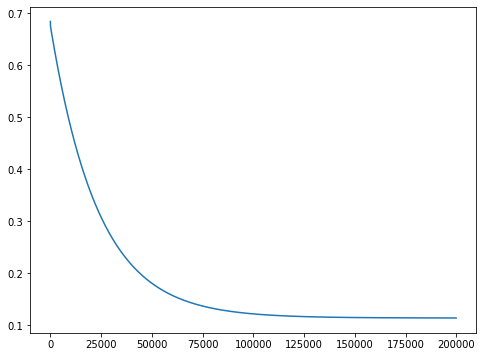

In [ ]:
# отбросим первые 150 наблюдений
plt.figure(figsize = (8, 6))
plt.plot(l_list[150:])
plt.show()

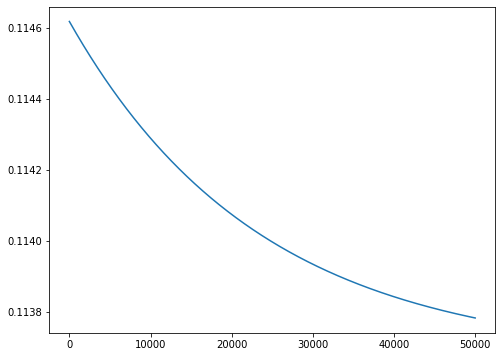

In [ ]:
# отбросим первые 150 000 наблюдений
plt.figure(figsize = (8, 6))
plt.plot(l_list[150000:])
plt.show()

#### Оценка качества модели

In [ ]:
# рассчитаем MSE
metrics.mean_squared_error(y, y_pred_gd)

0.2275647968306795

#### Визуализация шагов алгоритма оптимизации

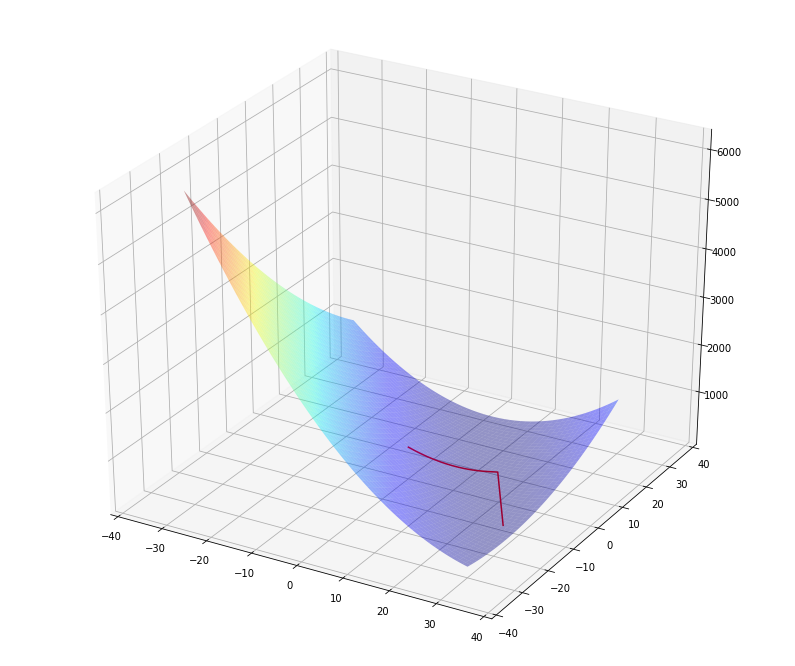

In [ ]:
# создадим последовательности из 500 значений
ww = np.linspace(-30, 30, 500)
bb = np.linspace(-30, 30, 500)

# сформируем координатную плоскость
www, bbb = np.meshgrid(ww, bb)

# а также матрицу из нулей для заполнения значениями функции J(w, b)
JJ = np.zeros([len(ww), len(bb)])

# для каждой комбинации w и b
for i in range(len(ww)):
    for j in range(len(bb)):

        # рассчитаем соответствующее прогнозное значение
        yy = www[i, j] * X + bbb[i, j]

        # и подставим его в функцию потерь (матрицу JJ)
        JJ[i, j] = 1 / (2 * len(X)) * np.sum((y - yy) ** 2)

# зададим размер графика
fig = plt.figure(figsize = (14,12))

# создидим трехмерное пространство
ax = fig.add_subplot(projection = '3d')

# построим функцию потерь
ax.plot_surface(www, bbb, JJ, alpha = 0.4, cmap = plt.cm.jet)

# а также путь алгоритма оптимизации
ax.plot(w_list, b_list, l_list, c = 'red')

# для наглядности зададим более широкие, чем график
# границы пространства
ax.set_xlim(-40, 40)
ax.set_ylim(-40, 40)

plt.show()

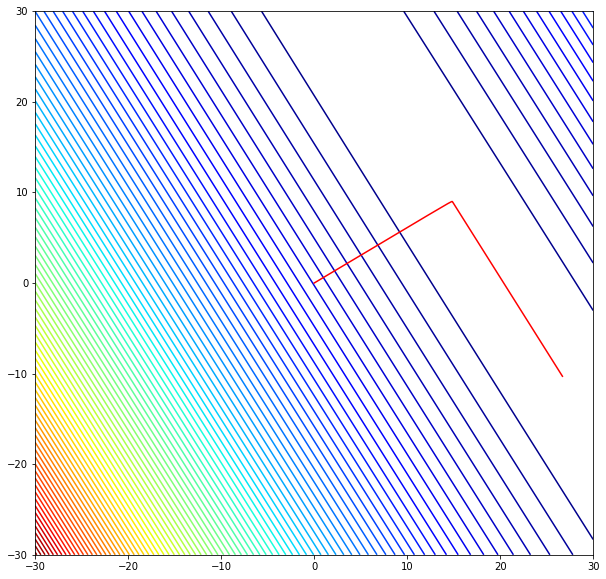

In [ ]:
# мы также можем построить график изолиний
fig, ax = plt.subplots(figsize = (10, 10))
ax.contour(www, bbb, JJ, 100, cmap = plt.cm.jet)
ax.plot(w_list, b_list, c = 'red')
plt.show()

#### Про выбор гиперпараметров модели

In [ ]:
# попробуем тот же размер шага, но уменьшим количество итераций
w_list_t1, b_list_t1, l_list_t1 = gradient_descent(X, y, iter = 10000, learning_rate = 0.01)
w_list_t1[-1], b_list_t1[-1], l_list_t1[-1]

(17.113947076094604, 5.3115083338092175, 0.4836593999661277)

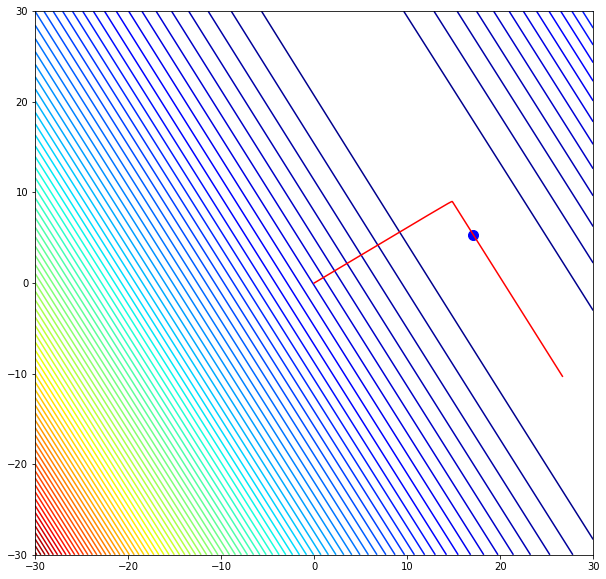

In [ ]:
# посмотрим, как мы продвинулись
fig, ax = plt.subplots(figsize = (10, 10))
ax.contour(www, bbb, JJ, 100, cmap = plt.cm.jet)
ax.plot(w_list, b_list, c = 'red')
ax.scatter(w_list_t1[-1], b_list_t1[-1], s = 100, c = 'blue')
plt.show()

In [ ]:
# теперь вернем на место итерации, но уменьшим шаг
w_list_t2, b_list_t2, l_list_t2 = gradient_descent(X, y, iter = 200000, learning_rate = 0.0001)
w_list_t2[-1], b_list_t2[-1], l_list_t2[-1]

(15.302448783526573, 8.263028645561734, 0.6339512457580667)

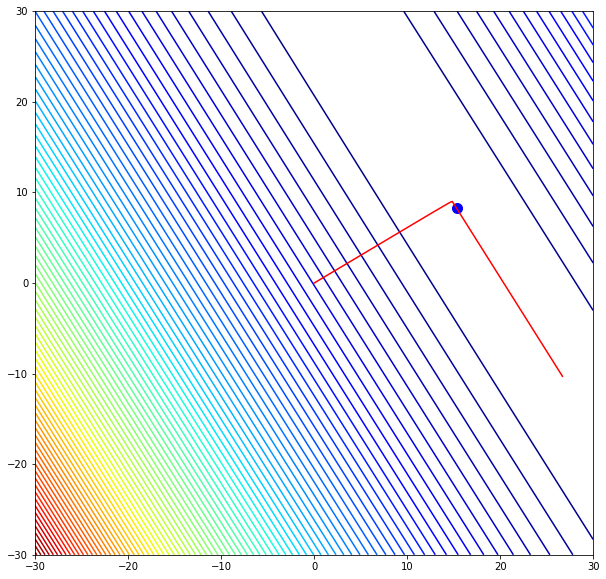

In [ ]:
# посмотрим, как мы продвинулись
fig, ax = plt.subplots(figsize = (10, 10))
ax.contour(www, bbb, JJ, 100, cmap = plt.cm.jet)
ax.plot(w_list, b_list, c = 'red')
ax.scatter(w_list_t2[-1], b_list_t2[-1], s = 100, c = 'blue')
plt.show()

## Вопросы

### Умножение функции на константу

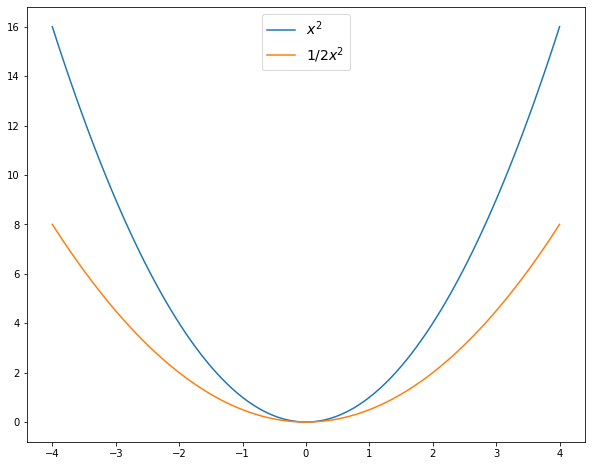

In [ ]:
# зададим размер графика в дюймах
plt.figure(figsize = (10, 8))

# объявим функцию параболы
def f(x):
    return x ** 2

# создадим координаты x
x = np.linspace(-4, 4, 100)

# выведем графики параболы и "половины" параболы на экран
plt.plot(x, f(x), label = '$x^2$')
plt.plot(x, 1/2 * f(x), label = '$1/2x^2$')

# зададим легенду
plt.legend(loc = 'upper center', prop = {'size': 14})

# выведем результат
plt.show()

### np.meshgrid()

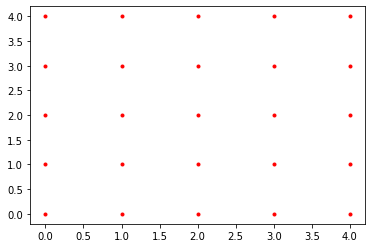

In [ ]:
# создадим простые последовательности
xvalues = np.array([0, 1, 2, 3, 4])
yvalues = np.array([0, 1, 2, 3, 4])

# сформируем координатную плоскость
xx, yy = np.meshgrid(xvalues, yvalues)

# выведем точки плоскости на графике
plt.plot(xx, yy, marker = '.', color = 'r', linestyle = 'none')
plt.show()

### np.fill_between()

In [ ]:
# объявим функцию параболы
def f(x):
  return x ** 2

**Вариант 1**. Пространство между функцией параболы и осью x.

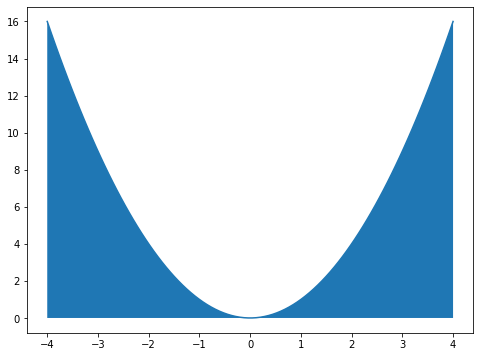

In [ ]:
# зададим размер графика
plt.figure(figsize = (8,6))

# создадим пространство по оси х от -4 до 4
x = np.linspace(-4, 4, 100)

# построим график параболы
plt.plot(x, f(x))

# и заполним пространство между осью x и параболой
plt.fill_between(x, f(x))

plt.show()

**Вариант 2**. Пространство между функцией параболы и y = 16.

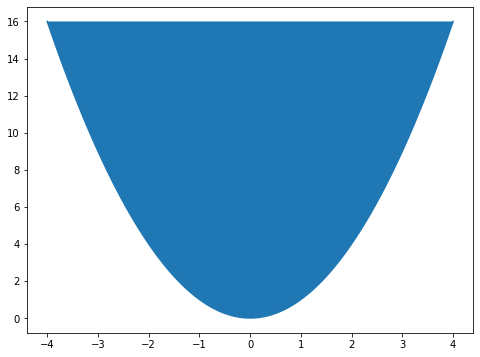

In [ ]:
# зададим размер графика
plt.figure(figsize = (8,6))

# создадим пространство от -4 до 4
x = np.linspace(-4, 4, 100)

# построим график параболы
plt.plot(x, f(x))

# и заполним пространство между параболой и
# горизонтальной линией y = 16
plt.fill_between(x, f(x), 16)

plt.show()

Обратите внимание, y = 16 выбрана не случайно. Так как пространство по оси x, заданное np.linspace(), находится в диапазоне от -4 до 4, края параболы как раз находятся в точке y = 16 ((-4) \** 2 = 16 и 4 \** 2 = 16).